In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#importing data
df = pd.read_csv('movies.csv')

In [3]:
#looking at data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.shape

(7668, 15)

In [5]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [6]:
#
df.rename(columns = {'name':'Movie_name', 'rating':'Rating', 'genre':'Genre', 'year':'Released_Year', 'released':'Released_date', 'score':'Score',
           'votes':'Votes','director':'Director', 'writer':'Writer', 'star':'Star', 'country':'Country', 
           'budget':'Budget', 'gross':'Gross_Profit', 'company':'Company','runtime':'Moview_time'},inplace=True)

In [7]:
df.columns

Index(['Movie_name', 'Rating', 'Genre', 'Released_Year', 'Released_date',
       'Score', 'Votes', 'Director', 'Writer', 'Star', 'Country', 'Budget',
       'Gross_Profit', 'Company', 'Moview_time'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_name     7668 non-null   object 
 1   Rating         7591 non-null   object 
 2   Genre          7668 non-null   object 
 3   Released_Year  7668 non-null   int64  
 4   Released_date  7666 non-null   object 
 5   Score          7665 non-null   float64
 6   Votes          7665 non-null   float64
 7   Director       7668 non-null   object 
 8   Writer         7665 non-null   object 
 9   Star           7667 non-null   object 
 10  Country        7665 non-null   object 
 11  Budget         5497 non-null   float64
 12  Gross_Profit   7479 non-null   float64
 13  Company        7651 non-null   object 
 14  Moview_time    7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [9]:
df.isnull().sum()

Movie_name          0
Rating             77
Genre               0
Released_Year       0
Released_date       2
Score               3
Votes               3
Director            0
Writer              3
Star                1
Country             3
Budget           2171
Gross_Profit      189
Company            17
Moview_time         4
dtype: int64

In [10]:
#lets check how much percentage is missing in each column
for i in df.columns:
    missing_percent = np.mean(df[i].isnull())
    print('{}-{}%'.format(i,(missing_percent)))
    #print('\n')

Movie_name-0.0%
Rating-0.010041731872717789%
Genre-0.0%
Released_Year-0.0%
Released_date-0.0002608242044861763%
Score-0.0003912363067292645%
Votes-0.0003912363067292645%
Director-0.0%
Writer-0.0003912363067292645%
Star-0.00013041210224308815%
Country-0.0003912363067292645%
Budget-0.2831246739697444%
Gross_Profit-0.02464788732394366%
Company-0.002217005738132499%
Moview_time-0.0005216484089723526%


In [11]:
#check duplicate value
df.duplicated().sum()

0

In [12]:
df.head()

,Movie_name,Rating,Genre,Released_Year,Released_date,Score,Votes,Director,Writer,Star,Country,Budget,Gross_Profit,Company,Moview_time
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [13]:
df.drop(columns=['Released_date'], inplace=True)
df.head()

,Movie_name,Rating,Genre,Released_Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross_Profit,Company,Moview_time
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [14]:
df.isna().sum()

Movie_name          0
Rating             77
Genre               0
Released_Year       0
Score               3
Votes               3
Director            0
Writer              3
Star                1
Country             3
Budget           2171
Gross_Profit      189
Company            17
Moview_time         4
dtype: int64

In [15]:
df.dropna(subset=['Rating','Score','Votes','Writer','Star','Country','Gross_Profit','Company','Moview_time'],inplace=True)
df.isnull().sum()

Movie_name          0
Rating              0
Genre               0
Released_Year       0
Score               0
Votes               0
Director            0
Writer              0
Star                0
Country             0
Budget           1991
Gross_Profit        0
Company             0
Moview_time         0
dtype: int64

In [16]:
#impute value to budget columns
#median = df['Budget'].median()
#df['Budget'].replace(np.nan,median,inplace=True)
#df['Budget'].isnull().sum()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Budget'>

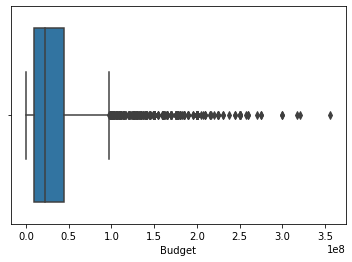

In [17]:
sns.boxplot(df['Budget'])

In [18]:
#impute value to budget columns with median due to existance of outlier
median = df['Budget'].median()
df['Budget'].replace(np.nan,median,inplace=True)
df['Budget'].isnull().sum()

0

In [19]:
#impute via knn-imputer
#from sklearn.impute import KNNImputer
#knn_imputer = KNNImputer(n_neighbors=2)
#df=knn_imputer.fit_transform(df) [df should be only numeric value]

In [20]:
#df[df.location == "Nepal"]
df[df.Budget=='The Shining']

,Movie_name,Rating,Genre,Released_Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross_Profit,Company,Moview_time


In [21]:
df

,Movie_name,Rating,Genre,Released_Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross_Profit,Company,Moview_time
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0
7652,The Eight Hundred,Not Rated,Action,2020,6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000.0,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0
7653,The Quarry,R,Crime,2020,5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,21800000.0,3661.0,Prowess Pictures,98.0
7656,Tulsa,PG-13,Comedy,2020,5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,21800000.0,413378.0,Pryor Entertainment,120.0


In [22]:
for i in df.columns:
    if df[i].dtype=='object':
        print(i,':', df[i].nunique())
        

Movie_name : 7267
Rating : 12
Genre : 18
Director : 2816
Writer : 4354
Star : 2652
Country : 57
Company : 2242


In [23]:
df['Rating'].value_counts()

R            3608
PG-13        2089
PG           1220
Not Rated     258
G             152
Unrated        45
NC-17          23
TV-MA           9
X               3
TV-PG           3
Approved        1
TV-14           1
Name: Rating, dtype: int64

In [24]:
df['Rating']=np.where(df['Rating']=='R','guardian_req_below17',df['Rating'])
df['Rating']=np.where(df['Rating']=='PG-13','guardian_req_below13',df['Rating'])
df['Rating']=np.where(df['Rating']=='NC-17','17+',df['Rating'])
df['Rating']=np.where(df['Rating']=='G','all_age',df['Rating'])
df['Rating']=np.where(df['Rating']=='PG','guardian_req_teen',df['Rating'])
df['Rating']=np.where(df['Rating']=='Unrated','Not Rated',df['Rating'])
df['Rating']=np.where(df['Rating']=='X','17+',df['Rating'])
df['Rating']=np.where(df['Rating']=='NC-17','17+',df['Rating'])
df['Rating']=np.where(df['Rating']=='TV-14','guardian_req_below13',df['Rating'])
df['Rating']=np.where(df['Rating']=='TV-MA','guardian_req_below17',df['Rating'])
df['Rating']=np.where(df['Rating']=='TV-PG','guardian_req_below17',df['Rating'])
df['Rating']=np.where(df['Rating']=='Approved','guardian_req_below17',df['Rating'])

In [25]:
df['Rating'].value_counts()

guardian_req_below17    3621
guardian_req_below13    2090
guardian_req_teen       1220
Not Rated                303
all_age                  152
17+                       26
Name: Rating, dtype: int64

In [26]:
df['Genre'].value_counts()

Comedy       2182
Action       1666
Drama        1439
Crime         536
Biography     429
Adventure     419
Animation     331
Horror        304
Fantasy        42
Mystery        20
Thriller       12
Family         10
Romance         8
Sci-Fi          8
Western         3
Music           1
Sport           1
Musical         1
Name: Genre, dtype: int64

In [27]:
#lets combine music and musical
df['Genre']= np.where(df['Genre']=='Musical','Music',df['Genre'])

In [28]:
#lets remove .o from num column
for i in df.columns:
    if df[i].dtype=='float64':
        df[i]=df[i].astype('int64')    

In [29]:
df.dtypes

Movie_name       object
Rating           object
Genre            object
Released_Year     int64
Score             int64
Votes             int64
Director         object
Writer           object
Star             object
Country          object
Budget            int64
Gross_Profit      int64
Company          object
Moview_time       int64
dtype: object

In [30]:
df.head()

,Movie_name,Rating,Genre,Released_Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross_Profit,Company,Moview_time
0,The Shining,guardian_req_below17,Drama,1980,8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,guardian_req_below17,Adventure,1980,5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,guardian_req_teen,Action,1980,8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,guardian_req_teen,Comedy,1980,7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,guardian_req_below17,Comedy,1980,7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [31]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Movie_name,7412,7267,Nobody's Fool,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,7412,6,guardian_req_below17,3621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,7412,17,Comedy,2182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Released_Year,7412.0,NaN,NaN,NaN,2000.640718,11.028736,1980.0,1991.0,2001.0,2010.0,2020.0
Score,7412.0,NaN,NaN,NaN,5.949137,1.010792,1.0,5.0,6.0,7.0,9.0
Votes,7412.0,NaN,NaN,NaN,90763.574204,165346.635273,105.0,10000.0,34000.0,96000.0,2400000.0
Director,7412,2816,Woody Allen,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Writer,7412,4354,Woody Allen,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star,7412,2652,Nicolas Cage,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,7412,57,United States,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.sort_values(by='Budget',ascending=False).head(10)

,Movie_name,Rating,Genre,Released_Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross_Profit,Company,Moview_time
7445,Avengers: Endgame,guardian_req_below13,Action,2019,8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
7244,Avengers: Infinity War,guardian_req_below13,Action,2018,8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
7075,Star Wars: Episode VIII - The Last Jedi,guardian_req_below13,Action,2017,7,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152
7066,Justice League,guardian_req_below13,Action,2017,6,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120
5060,Pirates of the Caribbean: at World's End,guardian_req_below13,Action,2007,7,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169
7463,Star Wars: Episode IX - The Rise of Skywalker,guardian_req_below13,Action,2019,6,394000,J.J. Abrams,Chris Terrio,Daisy Ridley,United States,275000000,1078232589,Walt Disney Pictures,141
7261,Solo: A Star Wars Story,guardian_req_below13,Action,2018,6,306000,Ron Howard,Jonathan Kasdan,Alden Ehrenreich,United States,275000000,392924807,Lucasfilm,135
4870,Superman Returns,guardian_req_below13,Action,2006,6,274000,Bryan Singer,Michael Dougherty,Brandon Routh,United States,270000000,391081192,Warner Bros.,154
7480,The Lion King,guardian_req_teen,Animation,2019,6,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118
5658,Tangled,guardian_req_teen,Animation,2010,7,417000,Nathan Greno,Dan Fogelman,Mandy Moore,United States,260000000,592462816,Walt Disney Animation Studios,100


In [33]:
df.sort_values(by='Gross_Profit',ascending=False).head(10)

,Movie_name,Rating,Genre,Released_Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross_Profit,Company,Moview_time
5445,Avatar,guardian_req_below13,Action,2009,7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,guardian_req_below13,Action,2019,8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,guardian_req_below13,Drama,1997,7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,guardian_req_below13,Action,2015,7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,guardian_req_below13,Action,2018,8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
7480,The Lion King,guardian_req_teen,Animation,2019,6,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118
6653,Jurassic World,guardian_req_below13,Action,2015,7,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124
6043,The Avengers,guardian_req_below13,Action,2012,8,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143
6646,Furious 7,guardian_req_below13,Action,2015,7,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137
7494,Frozen II,guardian_req_teen,Animation,2019,6,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103


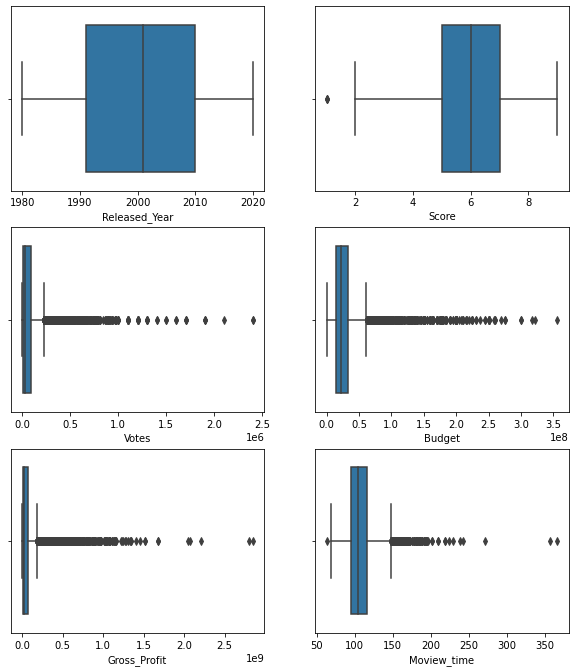

In [34]:
plt.figure(figsize=(10,40))
j=1
for i in df.columns:
    if df[i].dtype!='object':
        plt.subplot(10,2,j)
        sns.boxplot(x=df[i])
        j=j+1
        
        

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'guardian_req_below17'),
  Text(1, 0, 'guardian_req_teen'),
  Text(2, 0, 'all_age'),
  Text(3, 0, 'Not Rated'),
  Text(4, 0, '17+'),
  Text(5, 0, 'guardian_req_below13')])

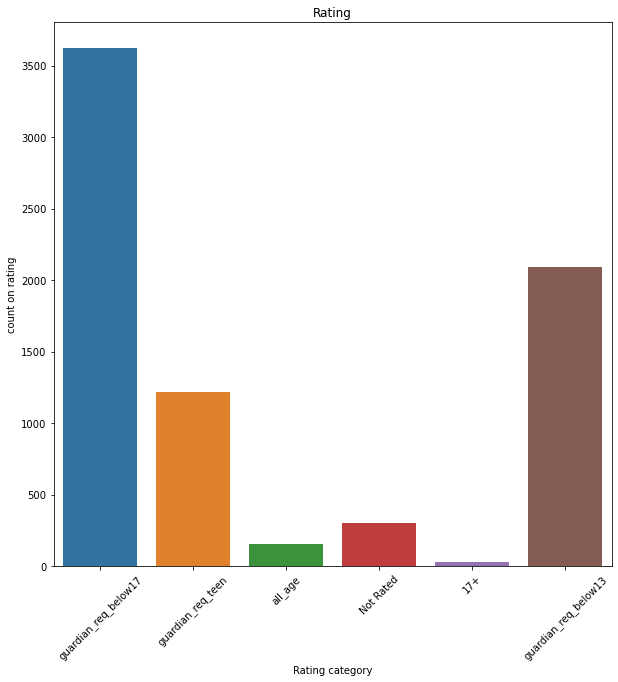

In [35]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='Rating')
plt.title('Rating')
plt.xlabel('Rating category')
plt.ylabel('count on rating')
plt.xticks(rotation=45)

<AxesSubplot:xlabel='Budget', ylabel='Gross_Profit'>

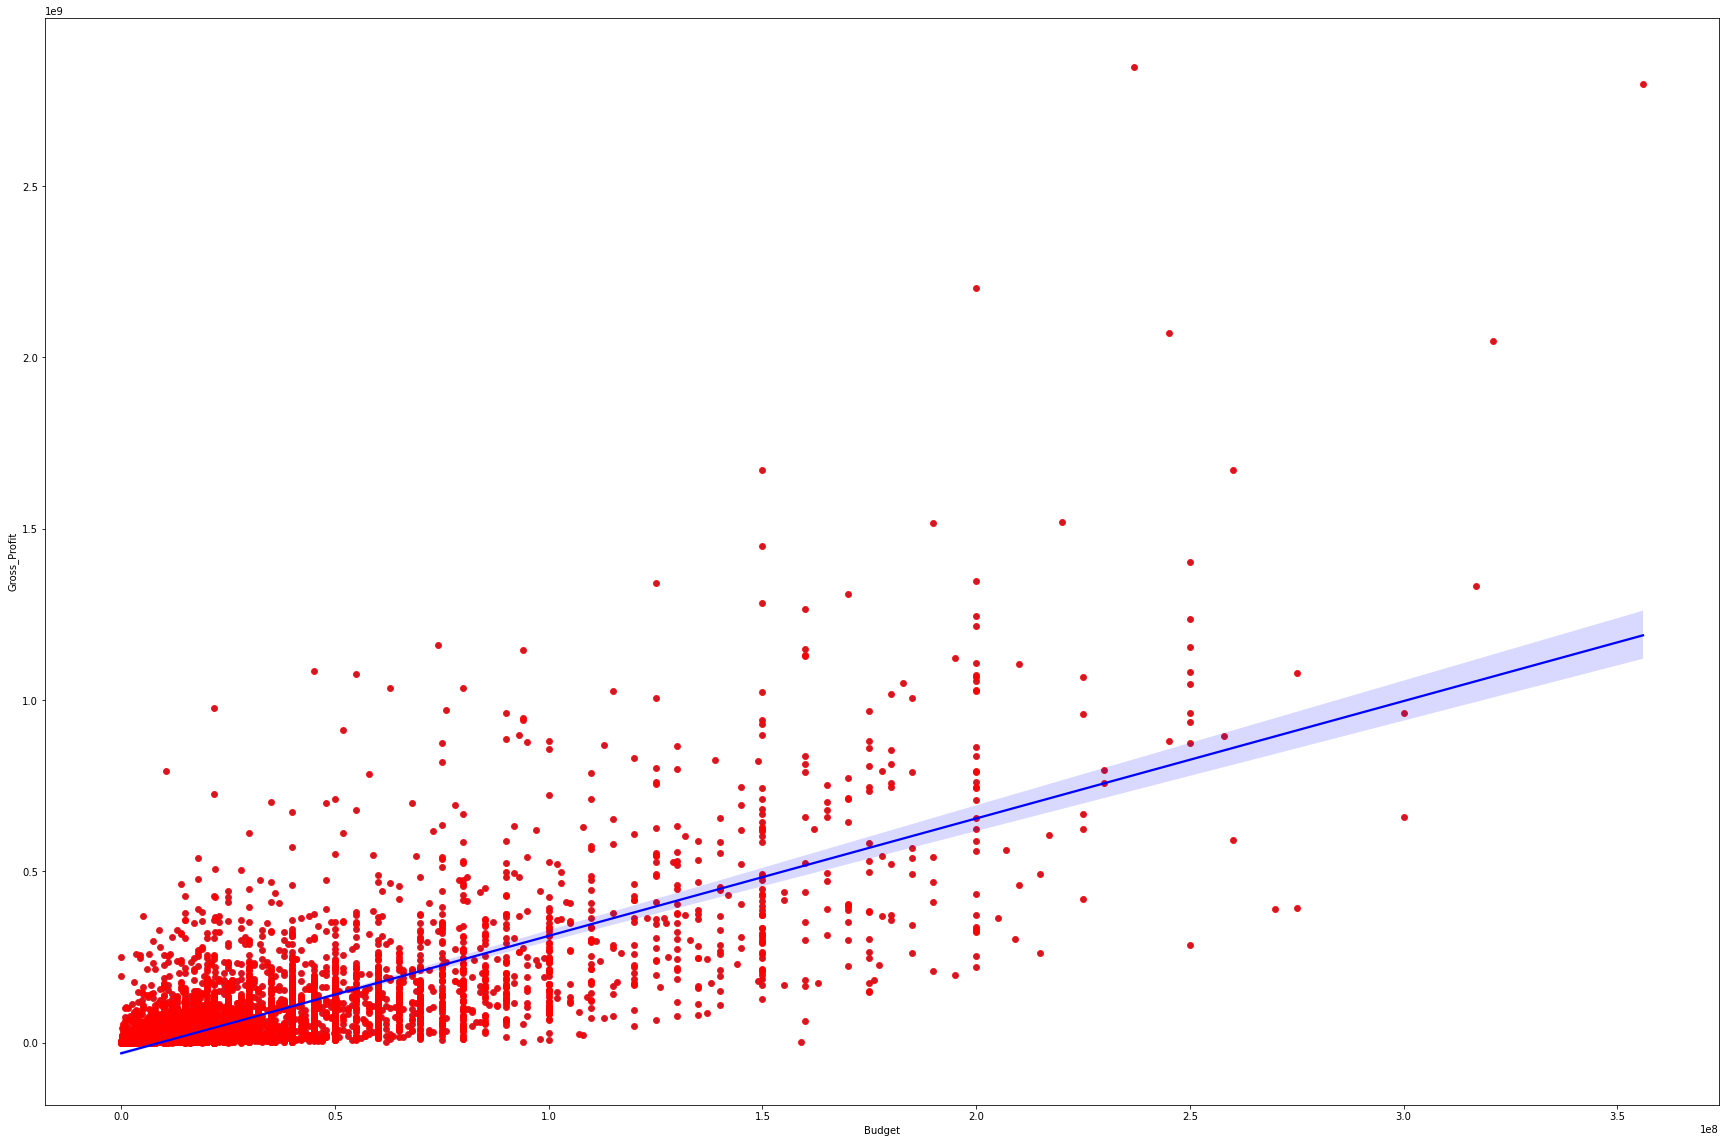

In [36]:
# lets check on bivariate analysis
# budget VS gross profit
plt.figure(figsize=(30,20))
sns.scatterplot(x=df['Budget'],y=df['Gross_Profit'])
sns.regplot(x=df['Budget'],y=df['Gross_Profit'],scatter_kws={'color':'red'},line_kws={'color':'blue'})

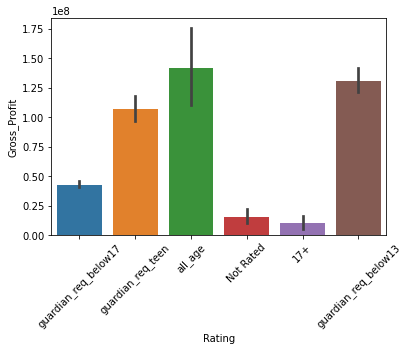

In [37]:
#Rating and profit
sns.barplot(x=df.Rating,y=df.Gross_Profit)
plt.xticks(rotation=45);

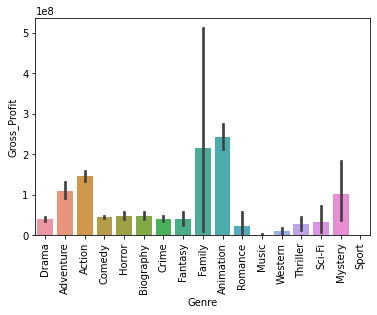

In [38]:

sns.barplot(x=df.Genre,y=df.Gross_Profit)
plt.xticks(rotation=90);

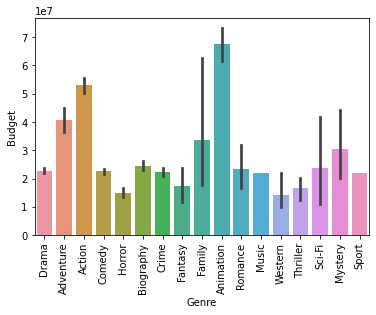

In [39]:
sns.barplot(x=df.Genre,y=df.Budget)
plt.xticks(rotation=90);

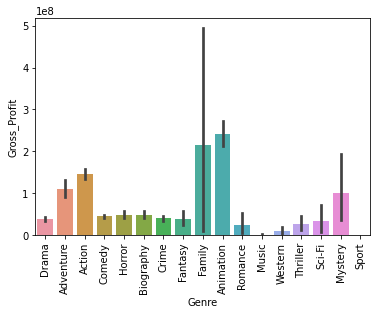

In [40]:
sns.barplot(x=df.Genre,y=df.Gross_Profit)
plt.xticks(rotation=90);

In [41]:
df.Star.value_counts()

Nicolas Cage         43
Tom Hanks            41
Robert De Niro       41
Denzel Washington    37
Bruce Willis         34
                     ..
Teri Hatcher          1
Pamela Anderson       1
Mike Judge            1
Kim Bodnia            1
Kristina Klebe        1
Name: Star, Length: 2652, dtype: int64

In [42]:
df.Star.value_counts()

Nicolas Cage         43
Tom Hanks            41
Robert De Niro       41
Denzel Washington    37
Bruce Willis         34
                     ..
Teri Hatcher          1
Pamela Anderson       1
Mike Judge            1
Kim Bodnia            1
Kristina Klebe        1
Name: Star, Length: 2652, dtype: int64

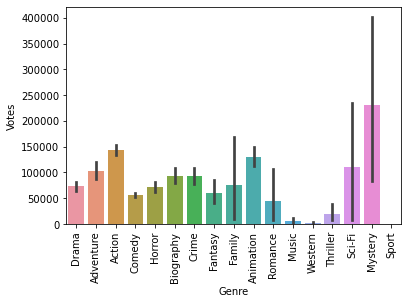

In [43]:
sns.barplot(x=df.Genre,y=df.Votes)
plt.xticks(rotation=90);

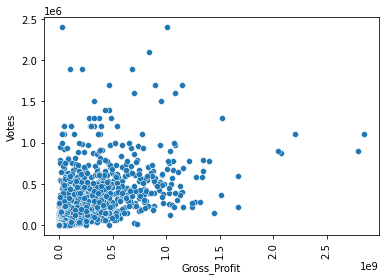

In [44]:
sns.scatterplot(x=df.Gross_Profit,y=df.Votes)
plt.xticks(rotation=90);

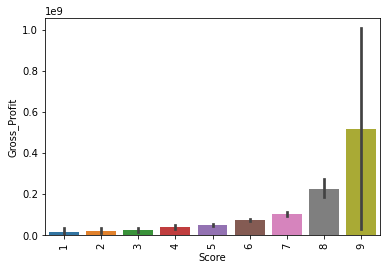

In [45]:
sns.barplot(y=df.Gross_Profit,x=df.Score)
plt.xticks(rotation=90);

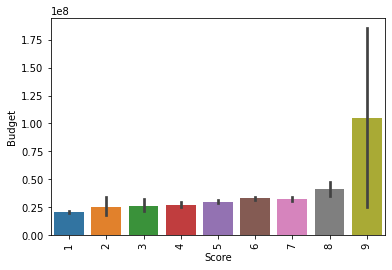

In [46]:
sns.barplot(y=df.Budget,x=df.Score)
plt.xticks(rotation=90);

In [47]:
df.corr()

,Released_Year,Score,Votes,Budget,Gross_Profit,Moview_time
Released_Year,1.000000,0.093512,0.218941,0.290399,0.258826,0.114237
Score,0.093512,1.000000,0.398762,0.054878,0.179006,0.381052
Votes,0.218941,0.398762,1.000000,0.455229,0.631110,0.309945
Budget,0.290399,0.054878,0.455229,1.000000,0.744394,0.273522
Gross_Profit,0.258826,0.179006,0.631110,0.744394,1.000000,0.245117
Moview_time,0.114237,0.381052,0.309945,0.273522,0.245117,1.000000


<AxesSubplot:>

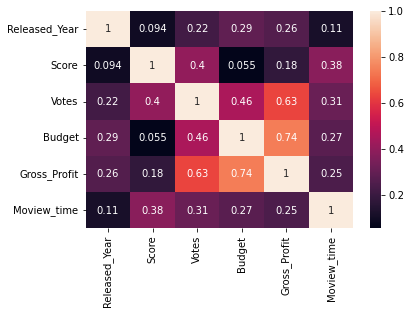

In [48]:
sns.heatmap(data=df.corr(),annot=True)

In [49]:
df.head()

,Movie_name,Rating,Genre,Released_Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross_Profit,Company,Moview_time
0,The Shining,guardian_req_below17,Drama,1980,8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,guardian_req_below17,Adventure,1980,5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,guardian_req_teen,Action,1980,8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,guardian_req_teen,Comedy,1980,7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,guardian_req_below17,Comedy,1980,7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [50]:
#lets convert all the object to numeric via changing dtype as it has huge no we cant use one-hot 
df_num=df.copy()
df_num['Movie_name']=pd.Categorical(df_num['Movie_name']).codes

In [51]:
for i in df_num.columns:
    if df_num[i].dtype=='object':
        df_num[i]=pd.Categorical(df_num[i]).codes

In [52]:
df_num.head()

,Movie_name,Rating,Genre,Released_Year,Score,Votes,Director,Writer,Star,Country,Budget,Gross_Profit,Company,Moview_time
0,6372,4,6,1980,8,927000,2471,3851,979,52,19000000,46998772,2179,146
1,5373,4,1,1980,5,65000,2169,1564,306,53,4500000,58853106,686,104
2,4956,5,0,1980,8,1200000,1063,2464,1642,53,18000000,538375067,1446,124
3,277,5,4,1980,7,221000,1248,1920,2112,53,3500000,83453539,1697,88
4,993,4,4,1980,7,108000,1010,499,387,53,6000000,39846344,1665,98


<AxesSubplot:>

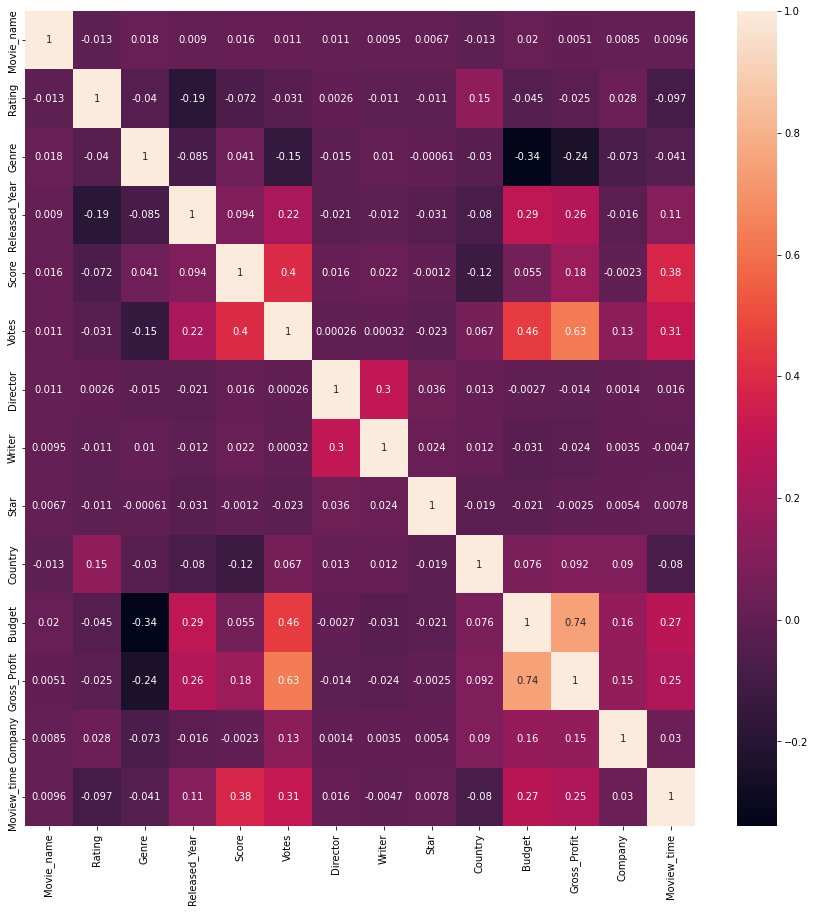

In [53]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df_num.corr(),annot=True)

In [61]:
corr_mat=df_num.corr()
corr_unstk = corr_mat.unstack().sort_values()
corr_unstk

Genre          Budget          -0.339568
Budget         Genre           -0.339568
Genre          Gross_Profit    -0.244663
Gross_Profit   Genre           -0.244663
Rating         Released_Year   -0.187945
Released_Year  Rating          -0.187945
Genre          Votes           -0.150047
Votes          Genre           -0.150047
Score          Country         -0.120411
Country        Score           -0.120411
Moview_time    Rating          -0.096625
Rating         Moview_time     -0.096625
Released_Year  Genre           -0.084831
Genre          Released_Year   -0.084831
Released_Year  Country         -0.080122
Country        Released_Year   -0.080122
Moview_time    Country         -0.079525
Country        Moview_time     -0.079525
Company        Genre           -0.072764
Genre          Company         -0.072764
Rating         Score           -0.072202
Score          Rating          -0.072202
Rating         Budget          -0.045119
Budget         Rating          -0.045119
Genre          M

In [59]:
pd.set_option('display.max_rows', None)

In [64]:
corr_unstk[(corr_unstk>0.5)]

Votes          Gross_Profit     0.631110
Gross_Profit   Votes            0.631110
               Budget           0.744394
Budget         Gross_Profit     0.744394
Movie_name     Movie_name       1.000000
Gross_Profit   Gross_Profit     1.000000
Budget         Budget           1.000000
Country        Country          1.000000
Star           Star             1.000000
Writer         Writer           1.000000
Director       Director         1.000000
Votes          Votes            1.000000
Score          Score            1.000000
Released_Year  Released_Year    1.000000
Genre          Genre            1.000000
Rating         Rating           1.000000
Company        Company          1.000000
Moview_time    Moview_time      1.000000
dtype: float64

In [ ]:
#thus there is a good correlation between profit and budget 
